Image loaded successfully!


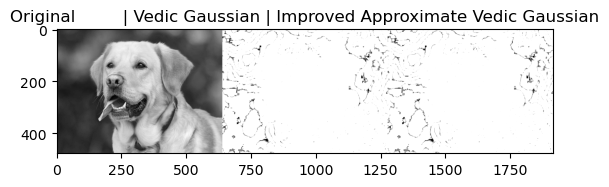

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim


def vedic_multiplier_4x4(a: int, b: int) -> int:
    """Vedic multiplier for two 4-bit inputs."""
    a0, a1 = a & 0b11, (a >> 2) & 0b11
    b0, b1 = b & 0b11, (b >> 2) & 0b11
    p0 = a0 * b0
    p1 = a0 * b1
    p2 = a1 * b0
    p3 = a1 * b1
    temp1 = p0
    temp2 = p1 << 2
    temp3 = p2 << 2
    temp4 = p3 << 4
    return temp1 + temp2 + temp3 + temp4


def improved_approx_vedic_multiplier_4x4(a: int, b: int) -> int:
    """Improved approximate Vedic multiplier for two 4-bit inputs."""
    a0, a1 = a & 0b11, (a >> 2) & 0b11
    b0, b1 = b & 0b11, (b >> 2) & 0b11
    # Approximation: Include p0, p1, and p3; ignore p2
    p0 = a0 * b0
    p1 = a0 * b1
    p3 = a1 * b1
    temp1 = p0
    temp2 = p1 << 2
    temp4 = p3 << 4
    return temp1 + temp2 + temp4


def apply_vedic_gaussian(image, gaussian_kernel):
    """Apply Gaussian filter using the Vedic multiplier logic."""
    rows, cols = image.shape
    result = np.zeros((rows - 2, cols - 2), dtype=np.uint8)

    # Scale the kernel values to integers for compatibility with Vedic multiplier
    scaled_kernel = (gaussian_kernel * 255).astype(int)  # Scale Gaussian kernel values

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Apply the kernel using Vedic multiplier
            value = 0
            for ki in range(3):
                for kj in range(3):
                    img_pixel = image[i + ki - 1, j + kj - 1]
                    kernel_value = scaled_kernel[ki, kj]
                    value += vedic_multiplier_4x4(img_pixel, kernel_value)
            result[i - 1, j - 1] = min(max(value, 0), 255)  # Clamp result to 8-bit range

    return result


def apply_improved_approx_vedic_gaussian(image, gaussian_kernel):
    """Apply Gaussian filter using the improved approximate Vedic multiplier logic."""
    rows, cols = image.shape
    result = np.zeros((rows - 2, cols - 2), dtype=np.uint8)

    # Scale the kernel values to integers for compatibility with approximate Vedic multiplier
    scaled_kernel = (gaussian_kernel * 255).astype(int)  # Scale Gaussian kernel values

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            # Apply the kernel using Improved Approximate Vedic multiplier
            value = 0
            for ki in range(3):
                for kj in range(3):
                    img_pixel = image[i + ki - 1, j + kj - 1]
                    kernel_value = scaled_kernel[ki, kj]
                    value += improved_approx_vedic_multiplier_4x4(img_pixel, kernel_value)
            result[i - 1, j - 1] = min(max(value, 0), 255)  # Clamp result to 8-bit range

    return result


# Load image in grayscale
image = cv2.imread('1673942102419image.jpeg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not loaded.")
else:
    print("Image loaded successfully!")

    # Define a 3x3 Gaussian kernel
    gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype=np.float32)
    gaussian_kernel /= 16  # Normalize the Gaussian kernel

    # Apply Gaussian filter using Vedic multiplier logic
    vedic_gaussian_result = apply_vedic_gaussian(image, gaussian_kernel)

    # Apply Gaussian filter using improved approximate Vedic multiplier logic
    improved_vedic_gaussian_result = apply_improved_approx_vedic_gaussian(image, gaussian_kernel)

    # Combine and display images
    combined = np.hstack((image[1:-1, 1:-1], vedic_gaussian_result, improved_vedic_gaussian_result))

    plt.imshow(combined, cmap='gray')
    plt.title('Original         | Vedic Gaussian | Improved Approximate Vedic Gaussian')
    plt.axis('on')
    plt.show()


In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as compare_ssim


# Vedic multiplier function for two 4-bit inputs
def vedic_multiplier_4x4(a: int, b: int) -> int:
    """Vedic multiplier for two 4-bit inputs."""
    a0, a1 = a & 0b11, (a >> 2) & 0b11
    b0, b1 = b & 0b11, (b >> 2) & 0b11
    p0 = a0 * b0
    p1 = a0 * b1
    p2 = a1 * b0
    p3 = a1 * b1
    temp1 = p0
    temp2 = p1 << 2
    temp3 = p2 << 2
    temp4 = p3 << 4
    return temp1 + temp2 + temp3 + temp4


# Improved approximate Vedic multiplier function
def improved_approx_vedic_multiplier_4x4(a: int, b: int) -> int:
    """Improved approximate Vedic multiplier for two 4-bit inputs."""
    a0, a1 = a & 0b11, (a >> 2) & 0b11
    b0, b1 = b & 0b11, (b >> 2) & 0b11
    p0 = a0 * b0
    p1 = a0 * b1
    p3 = a1 * b1
    temp1 = p0
    temp2 = p1 << 2
    temp4 = p3 << 4
    return temp1 + temp2 + temp4


# Apply Gaussian filter using the Vedic multiplier logic
def apply_vedic_gaussian(image, gaussian_kernel):
    """Apply Gaussian filter using the Vedic multiplier logic."""
    rows, cols = image.shape
    result = np.zeros((rows - 2, cols - 2), dtype=np.uint8)

    scaled_kernel = (gaussian_kernel * 255).astype(int)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            value = 0
            for ki in range(3):
                for kj in range(3):
                    img_pixel = image[i + ki - 1, j + kj - 1]
                    kernel_value = scaled_kernel[ki, kj]
                    value += vedic_multiplier_4x4(img_pixel, kernel_value)
            result[i - 1, j - 1] = min(max(value, 0), 255)

    return result


# Apply Gaussian filter using the improved approximate Vedic multiplier logic
def apply_improved_approx_vedic_gaussian(image, gaussian_kernel):
    """Apply Gaussian filter using the improved approximate Vedic multiplier logic."""
    rows, cols = image.shape
    result = np.zeros((rows - 2, cols - 2), dtype=np.uint8)

    scaled_kernel = (gaussian_kernel * 255).astype(int)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            value = 0
            for ki in range(3):
                for kj in range(3):
                    img_pixel = image[i + ki - 1, j + kj - 1]
                    kernel_value = scaled_kernel[ki, kj]
                    value += improved_approx_vedic_multiplier_4x4(img_pixel, kernel_value)
            result[i - 1, j - 1] = min(max(value, 0), 255)

    return result


# Compute metrics
def compute_mse(original, compared):
    return np.mean((original - compared) ** 2)


def compute_mae(original, compared):
    return np.mean(np.abs(original - compared))


def compute_mad(original, compared):
    return np.mean(np.abs(original - np.mean(original)))


def compute_ad(original, compared):
    return np.mean(np.abs(original - compared))


def compute_naae(original, compared):
    numerator = np.sum(np.abs(original - compared))
    denominator = np.sum(original) + 1e-5
    return numerator / denominator


def compute_psnr(original, compared):
    mse = compute_mse(original, compared)
    if mse == 0:
        return float('inf')
    max_pixel_value = 255
    return 20 * np.log10(max_pixel_value / np.sqrt(mse))


# Load image in grayscale
image = cv2.imread('1673942102419image.jpeg', cv2.IMREAD_GRAYSCALE)
if image is None:
    print("Error: Image not loaded.")
else:
    print("Image loaded successfully!")

    # Define a 3x3 Gaussian kernel
    gaussian_kernel = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]], dtype=np.float32)
    gaussian_kernel /= 16  # Normalize the kernel

    # Apply Gaussian filter with both methods
    vedic_gaussian_result = apply_vedic_gaussian(image, gaussian_kernel)
    improved_vedic_gaussian_result = apply_improved_approx_vedic_gaussian(image, gaussian_kernel)

    # Compute metrics
    # Metrics for Vedic Gaussian
    mse_vedic = compute_mse(image[1:-1, 1:-1], vedic_gaussian_result)
    mae_vedic = compute_mae(image[1:-1, 1:-1], vedic_gaussian_result)
    mad_vedic = compute_mad(image[1:-1, 1:-1], vedic_gaussian_result)
    ad_vedic = compute_ad(image[1:-1, 1:-1], vedic_gaussian_result)
    naae_vedic = compute_naae(image[1:-1, 1:-1], vedic_gaussian_result)
    psnr_vedic = compute_psnr(image[1:-1, 1:-1], vedic_gaussian_result)
    ssim_vedic = compare_ssim(image[1:-1, 1:-1], vedic_gaussian_result)

    # Metrics for Improved Approximate Vedic Gaussian
    mse_approx = compute_mse(image[1:-1, 1:-1], improved_vedic_gaussian_result)
    mae_approx = compute_mae(image[1:-1, 1:-1], improved_vedic_gaussian_result)
    mad_approx = compute_mad(image[1:-1, 1:-1], improved_vedic_gaussian_result)
    ad_approx = compute_ad(image[1:-1, 1:-1], improved_vedic_gaussian_result)
    naae_approx = compute_naae(image[1:-1, 1:-1], improved_vedic_gaussian_result)
    psnr_approx = compute_psnr(image[1:-1, 1:-1], improved_vedic_gaussian_result)
    ssim_approx = compare_ssim(image[1:-1, 1:-1], improved_vedic_gaussian_result)

    # Print computed metrics
    print("Vedic Gaussian Metrics:")
    print(f"PSNR: {psnr_vedic}")
    print(f"SSIM: {ssim_vedic}")
    print(f"MSE: {mse_vedic}")
    print(f"MAE: {mae_vedic}")
    print(f"MAD: {mad_vedic}")
    print(f"AD: {ad_vedic}")
    print(f"NAE: {naae_vedic}")

    print("\nImproved Approximate Vedic Gaussian Metrics:")
    print(f"PSNR: {psnr_approx}")
    print(f"SSIM: {ssim_approx}")
    print(f"MSE: {mse_approx}")
    print(f"MAE: {mae_approx}")
    print(f"MAD: {mad_approx}")
    print(f"AD: {ad_approx}")
    print(f"NAE: {naae_approx}")


Image loaded successfully!
Vedic Gaussian Metrics:
PSNR: 27.64356853218792
SSIM: 0.3497195529085508
MSE: 111.87254233286552
MAE: 123.21874713080888
MAD: 56.8413957410161
AD: 123.21874713080888
NAE: 1.0288695727787778

Improved Approximate Vedic Gaussian Metrics:
PSNR: 27.641965671520865
SSIM: 0.34671052057983587
MSE: 111.91383901050615
MAE: 123.29901234244042
MAD: 56.8413957410161
AD: 123.29901234244042
NAE: 1.0295397827583734
